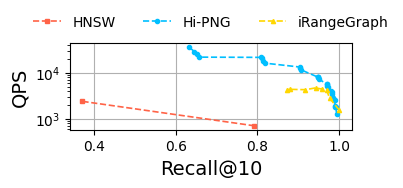

In [27]:
from function import pareto_frontier
import json, os
import matplotlib.pyplot as plt
import numpy as np

perf_output = "perf/rf_anns"

dataset = 'sift-128-euclidean'

perf1 = json.load(open(os.path.join(perf_output, f"{dataset}.HNSW.json")))
perf2 = json.load(open(os.path.join(perf_output, f"{dataset}.Hi-PNG-HNSW.json")))
perf1, perf2 = pareto_frontier(perf1, 0.3), pareto_frontier(perf2, 0.3)
recall1, recall2 = [item["recall"] for item in perf1], [item["recall"] for item in perf2]
qps1, qps2 = [item["qps"] for item in perf1], [item["qps"] for item in perf2]
# iRangeGraph performance
perf3 = np.loadtxt("perf/rf_anns2/sift-128-euclidean.iRangeGraph.csv", delimiter=',')
recall3, qps3 = perf3[:, 1].tolist(), perf3[:, 2].tolist()
# Plot
plt.figure(figsize=(4, 2))
plt.plot(recall1, qps1, marker='s', color='tomato', linewidth=1.2, linestyle='dashed', markersize=3)
plt.plot(recall2, qps2, marker='o', color='deepskyblue', linewidth=1.2, linestyle='dashed', markersize=3)
plt.plot(recall3, qps3, marker='^', color='gold', linewidth=1.2, linestyle='dashed', markersize=3)
plt.yscale('log')
plt.xlabel('Recall@10', fontsize=14)
plt.ylabel('QPS', fontsize=14) 
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.grid(True)
# plt.title("RF-ANNS vs IF-ANNS on SIFT1M", loc='center', pad=50)
plt.legend(["HNSW", "Hi-PNG", "iRangeGraph"],
           frameon=False,
           bbox_to_anchor=(0.5, 1.02),
           loc='lower center',
           ncol=3
           )
plt.tight_layout()
plt.savefig("rfanns2.pdf", bbox_inches='tight', dpi=300)


In [28]:
from scipy.interpolate import interp1d

# Create interpolation functions for each method
f1 = interp1d(recall1, qps1, bounds_error=False, fill_value="extrapolate")
f2 = interp1d(recall2, qps2, bounds_error=False, fill_value="extrapolate")
f3 = interp1d(recall3, qps3, bounds_error=False, fill_value="extrapolate")

# Target recall values
target_recalls = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Calculate interpolated QPS values
qps1_interp = f1(target_recalls)
qps2_interp = f2(target_recalls)
qps3_interp = f3(target_recalls)

# Create and display markdown table
print("| Recall | Post-Filtering-HNSW QPS | Hi-PNG-HNSW QPS | iRangeGraph QPS |")
print("|--------|-------------------------|-----------------|-----------------|")
for i, recall in enumerate(target_recalls):
    print(f"| {recall:.1f} | {qps1_interp[i]:.2f} | {qps2_interp[i]:.2f} | {qps3_interp[i]:.2f} |")

| Recall | Post-Filtering-HNSW QPS | Hi-PNG-HNSW QPS | iRangeGraph QPS |
|--------|-------------------------|-----------------|-----------------|
| 0.4 | 2274.16 | 159828.05 | 1706.59 |
| 0.5 | 1873.77 | 106488.60 | 2260.09 |
| 0.6 | 1473.37 | 53149.14 | 2813.59 |
| 0.7 | 1072.98 | 21747.00 | 3367.10 |
| 0.8 | 672.58 | 21578.31 | 3920.60 |
| 0.9 | 272.19 | 13426.52 | 4317.19 |
| 1.0 | -128.21 | -988.61 | 1556.46 |
